## Categorical Data Imputation

There is many ways to do this. Two of them are 
1. Fillup null values with Most Frequent Data,
2. Create a new category named 'Missing'

In numerical data imputation, we did filled up missing values with Mean or Median if it's MCAR and missing values are less than 5%. But here we fills missing values with Mode value

# CODE

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('house.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [29]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [30]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of Houses')

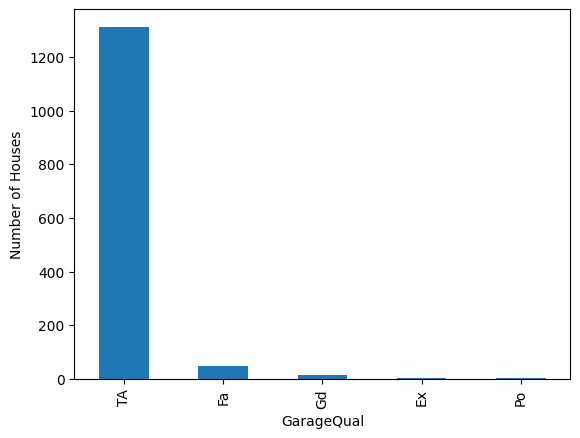

In [31]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of Houses')

In [32]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GeneralQual')

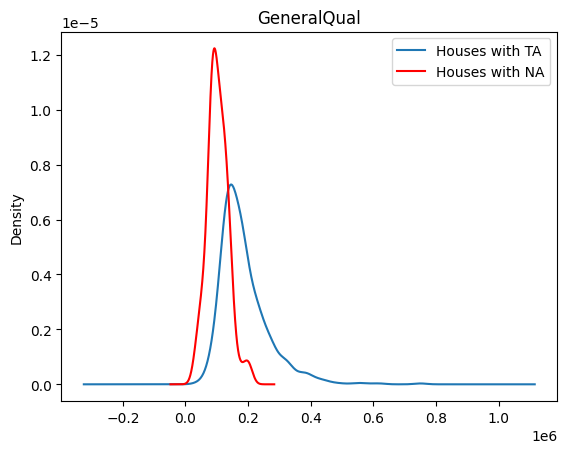

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines,labels,loc='best')

plt.title('GeneralQual')

In [34]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [35]:
# df['GarageQual'].fillna('TA',inplace=True)
df['GarageQual'].fillna('Missing',inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_8328\2320326524.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('Missing',inplace=True)


<Axes: xlabel='GarageQual'>

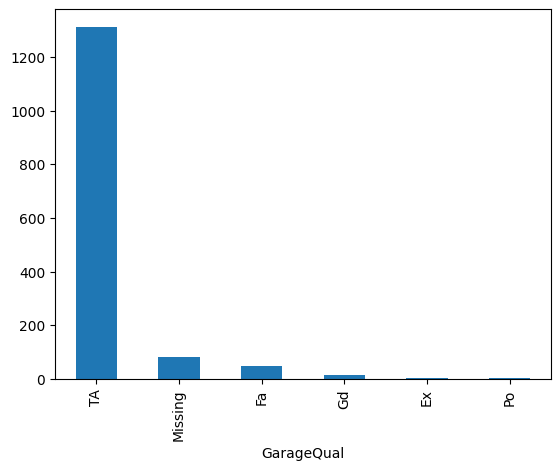

In [36]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GeneralQual')

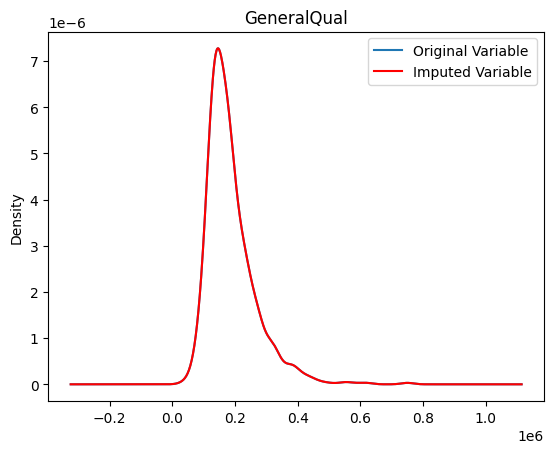

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')
# df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original Variable', 'Imputed Variable']
ax.legend(lines,labels,loc='best')

plt.title('GeneralQual')

<Axes: xlabel='FireplaceQu'>

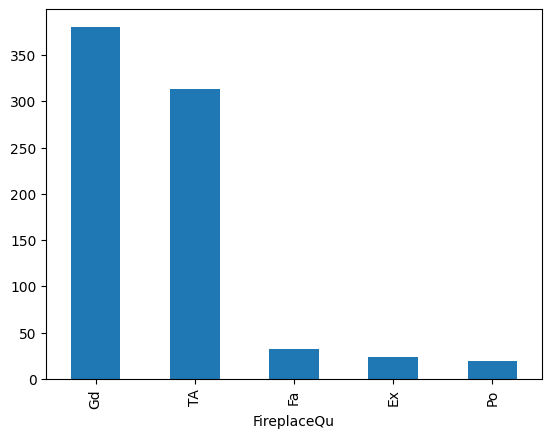

In [38]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [39]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

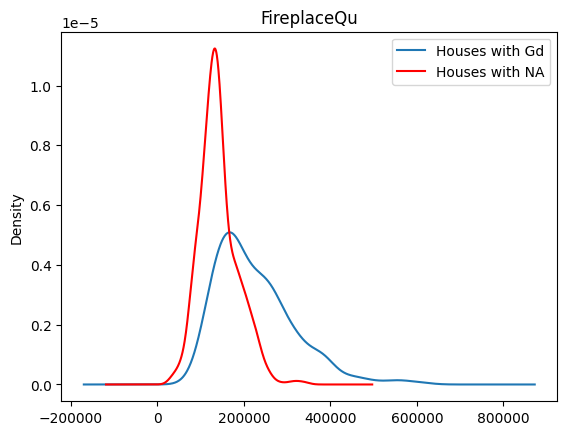

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

In [41]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

C:\Users\USER\AppData\Local\Temp\ipykernel_8328\3129134643.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd',inplace=True)


<Axes: xlabel='FireplaceQu'>

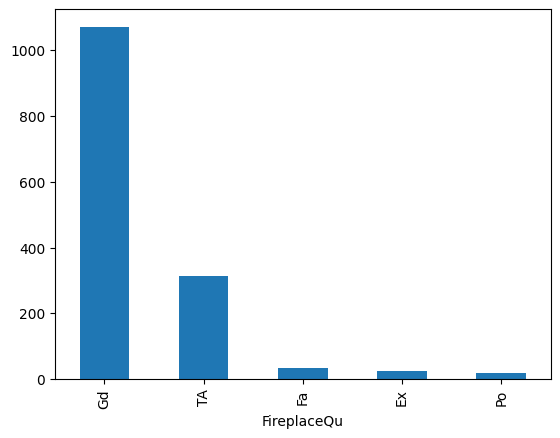

In [42]:
df['FireplaceQu'].fillna('Gd',inplace=True)
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

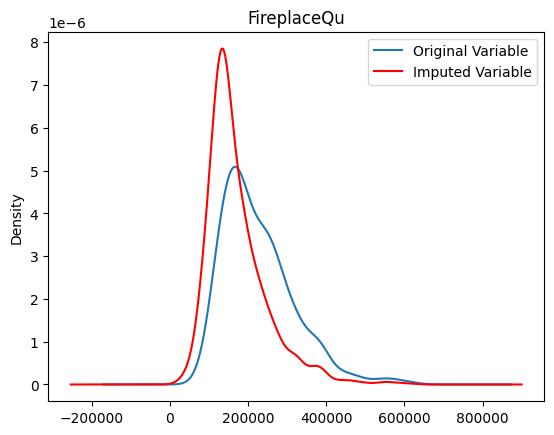

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')
# df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original Variable', 'Imputed Variable']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [45]:
from sklearn.impute import SimpleImputer

In [49]:
# imputer = SimpleImputer(strategy='most_frequent')
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [50]:
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [51]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)